<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/Projeto6_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.1.0'

In [0]:
diabetes = pd.read_csv('/content/diabetes.csv')

In [51]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


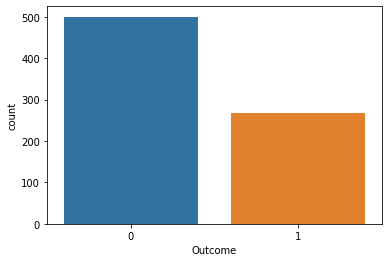

In [53]:
sns.countplot(x='Outcome', data = diabetes)

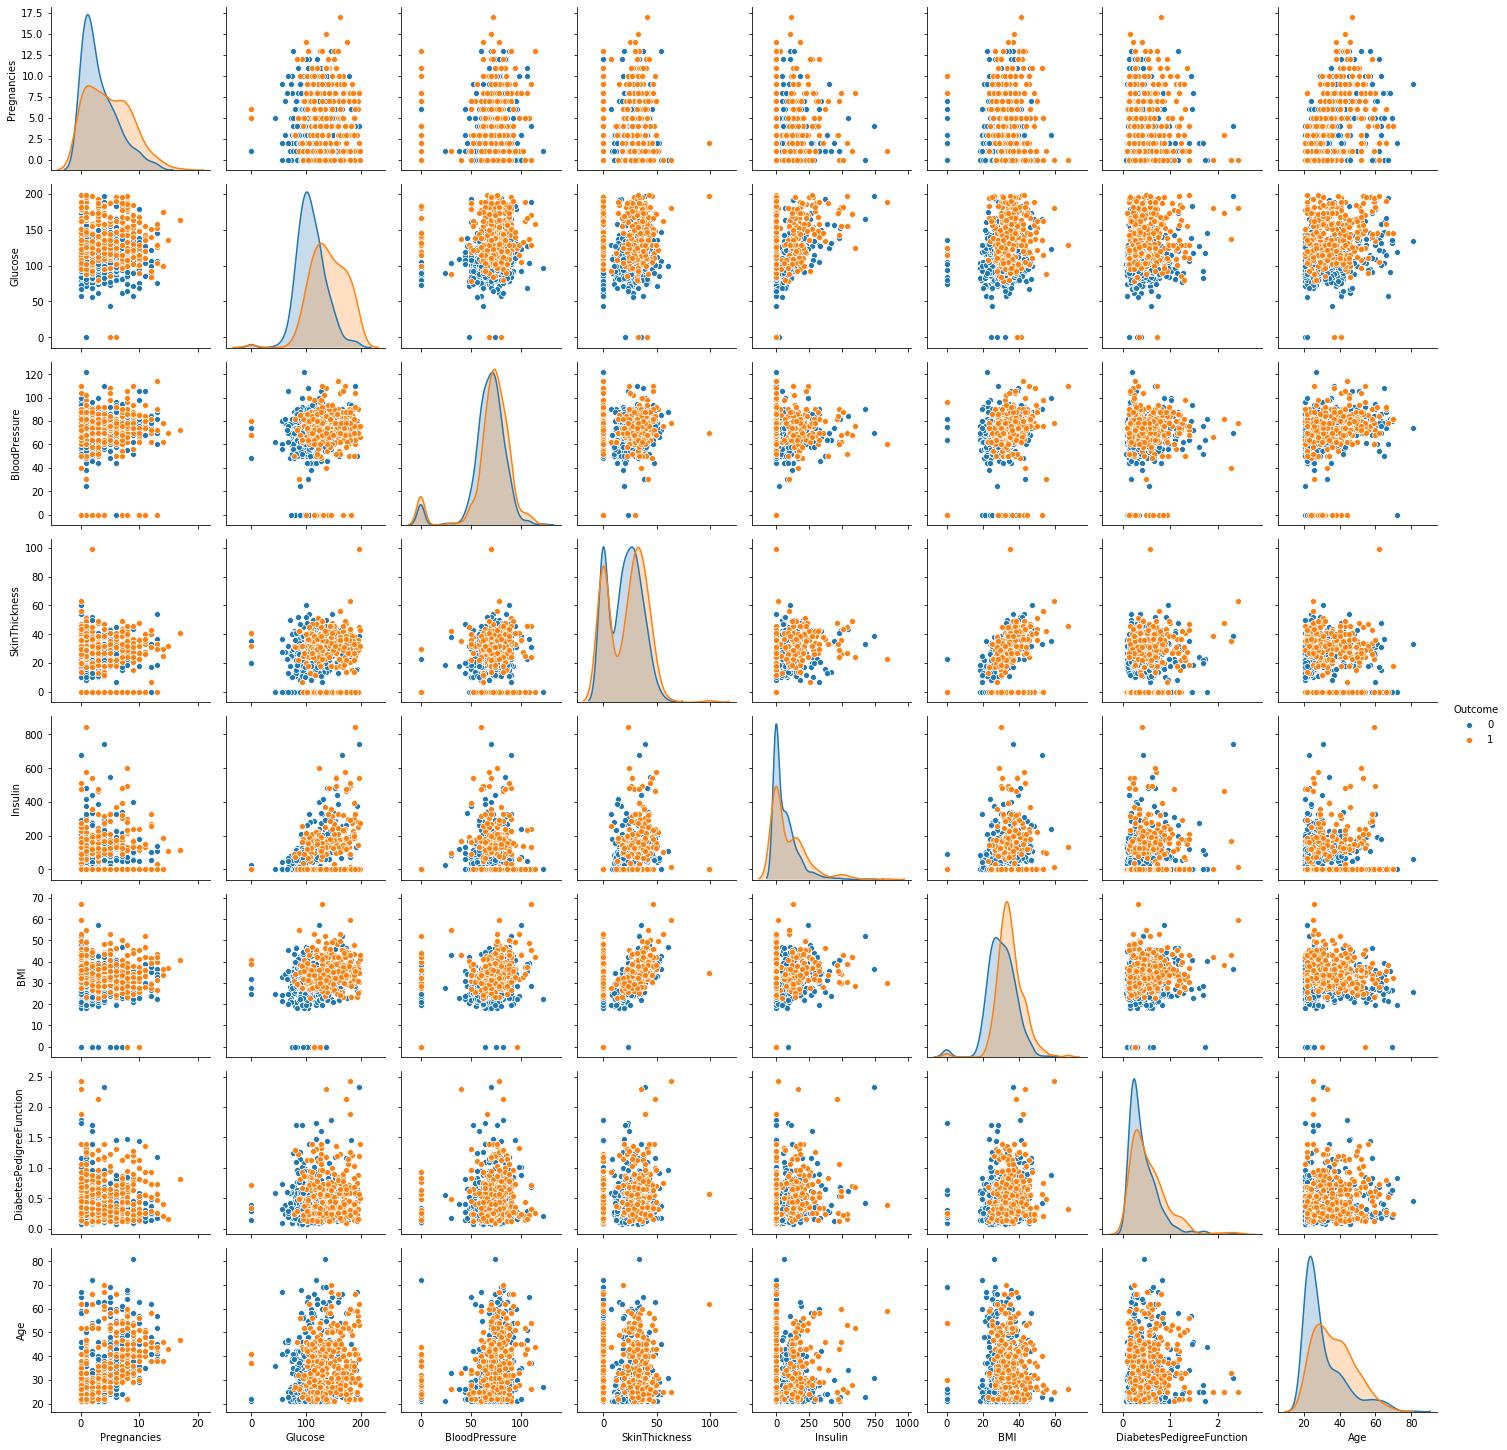

In [54]:
sns.pairplot(diabetes, hue = 'Outcome', 
             vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']);

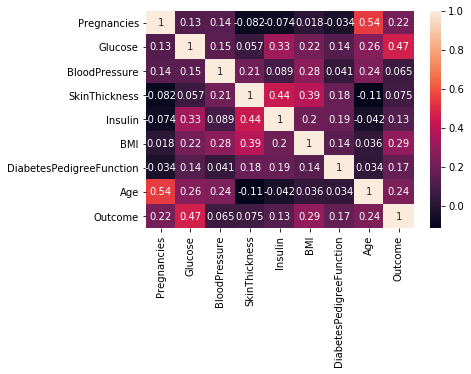

In [55]:
sns.heatmap(diabetes.corr(), annot = True);

In [56]:
diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [0]:
X = diabetes.iloc[:, 0:8].values

In [58]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [0]:
y = diabetes.iloc[:, -1].values

In [60]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [62]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  # Divisao da base de dados entre treinamento e teste

In [64]:
X_train.shape

(614, 8)

In [65]:
X_test.shape

(154, 8)

# Construção e treinamento do modelo

In [0]:
# 8 -> 400 -> 400 -> 1 :: Input shape
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
classifier.add(tf.keras.layers.Dropout(0.2))  # Vai zerar 20% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))  # Vai zerar 20% dos neuronios de cima
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [67]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               3600      
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [0]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [69]:
epochs_hist = classifier.fit(X_train, y_train, epochs = 200)

Train on 614 samples
Epoch 1/200
614/614 [==============================] - 0s 796us/sample - loss: 0.5615 - accuracy: 0.7378
Epoch 2/200
614/614 [==============================] - 0s 153us/sample - loss: 0.4762 - accuracy: 0.7801
Epoch 3/200
614/614 [==============================] - 0s 162us/sample - loss: 0.4641 - accuracy: 0.7834
Epoch 4/200
614/614 [==============================] - 0s 168us/sample - loss: 0.4532 - accuracy: 0.8046
Epoch 5/200
614/614 [==============================] - 0s 163us/sample - loss: 0.4583 - accuracy: 0.7850
Epoch 6/200
614/614 [==============================] - 0s 155us/sample - loss: 0.4478 - accuracy: 0.7980
Epoch 7/200
614/614 [==============================] - 0s 175us/sample - loss: 0.4372 - accuracy: 0.8013
Epoch 8/200
614/614 [==============================] - 0s 147us/sample - loss: 0.4377 - accuracy: 0.8029
Epoch 9/200
614/614 [==============================] - 0s 175us/sample - loss: 0.4215 - accuracy: 0.8062
Epoch 10/200
614/614 [============

In [0]:
y_pred = classifier.predict(X_test)

In [71]:
y_pred

array([[1.0114455e-03],
       [2.6459755e-02],
       [3.0039375e-05],
       [6.0926181e-01],
       [2.1978461e-03],
       [9.8575670e-01],
       [7.1501672e-05],
       [3.5610232e-03],
       [1.2964048e-21],
       [2.0497462e-08],
       [9.9737644e-01],
       [4.4413665e-04],
       [9.9874121e-01],
       [1.0886400e-04],
       [1.6500485e-04],
       [9.9977797e-01],
       [9.2422032e-01],
       [1.6657313e-02],
       [1.1948814e-03],
       [1.4238097e-08],
       [5.0783479e-03],
       [7.9764211e-01],
       [2.4794218e-12],
       [9.9890864e-01],
       [9.7792780e-01],
       [8.0472633e-04],
       [1.6640841e-04],
       [1.0228435e-05],
       [9.9933881e-01],
       [5.1636189e-01],
       [8.5405427e-01],
       [2.0605929e-01],
       [7.8876562e-02],
       [1.0595309e-05],
       [9.9939239e-01],
       [2.0782456e-05],
       [1.3772665e-02],
       [9.7956401e-01],
       [9.5142591e-01],
       [9.4150066e-01],
       [1.9253172e-02],
       [7.915248

In [0]:
y_pred = (y_pred > 0.5)

In [73]:
y_pred

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [

In [74]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

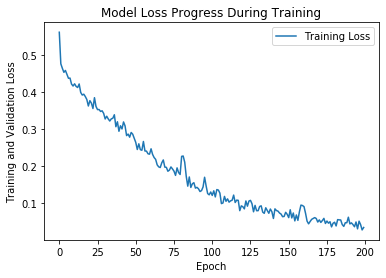

In [75]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss']);

In [77]:

# Para fazer uma previsao: Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
X_test_previsao = np.array([[0,118,84,47,230,45.8,0.551,31,1]])
X_test_previsao_scaled = sc.fit_transform(X_test_previsao)
y_predict_previsao_scaled = classifier.predict(X_test_previsao_scaled)
y_predict_previsao = sc.inverse_transform(y_predict_previsao_scaled)
y_predict_previsao

ValueError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True);

In [0]:
cm

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred, y_train))

In [0]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))